# Pathway associated gene expression heatmap

This notebook will use heatmaps to visualize the gene expression for selected genes that correspond to selected pathways. These pathways have been selected for their roles in tumor proliferation and chemotherapy resistance.

1. Tumor Proliferation
    1. G2/M Cell Cycle Checkpoint
        1. CDC25C; CDK1; PLK1; AURKA; WEE1. Kai Liu, et al. [4]
    1. E2F Regulation
        1. CDK1; CCNA2; E2F1; E2F2.  Zeyu Xing, et. al. [5]
2. Chemotherapy Resistance
    2. DNA Damage Response (DDR)
        2. BRCA1/BRCA2; RAD51; ATM; CHEK2; XRCC1. Emily Cybulla, et al. [6]
    2. Unfolded Protein Response (UPR)
        2. ATF6; XBP1; CHOP; GRP78 (BiP).; PERK

## 0. Initializations

In [1]:
# -- imports --
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.storage import get_resources_path
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [2]:
# -- datasets --
gse = GSE161529()

2025-08-01 13:27:23,618 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-08-01 13:27:23,711 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-08-01 13:27:23,859 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-08-01 13:27:23,912 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-08-01 13:27:24,056 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

In [3]:
all_real, all_noise = gse.get_combined_epithilial_dataset()

2025-08-01 13:27:30,468 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


In [4]:
tumor_proliferation_genes = list(gse.G2M_CHECKPOINT_GENES.values())
tumor_proliferation_genes.extend(list(gse.E2F_REGULATION_GENES.values()))

chemo_resistance_genes = list(gse.DDR_GENES.values())
chemo_resistance_genes.extend(list(gse.UPR_GENES.values()))

## 1. Tumor Proliferation

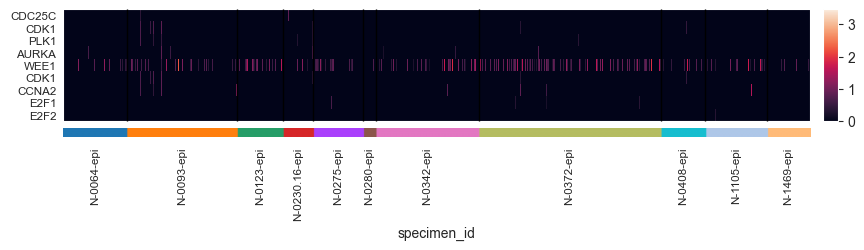

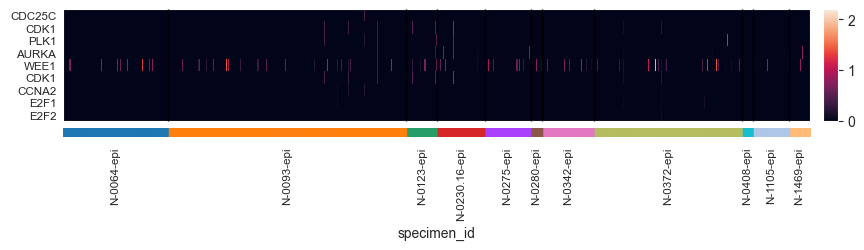

In [5]:
for adata in [all_real, all_noise]:
    sc.pl.heatmap(
        adata,
        var_names=tumor_proliferation_genes,
        groupby='specimen_id',
        use_raw=True,
        swap_axes=True,
        show=True,
    )

## 2. Chemotherapy resistance

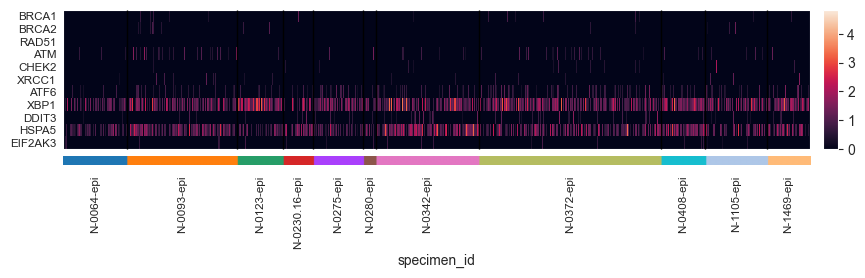

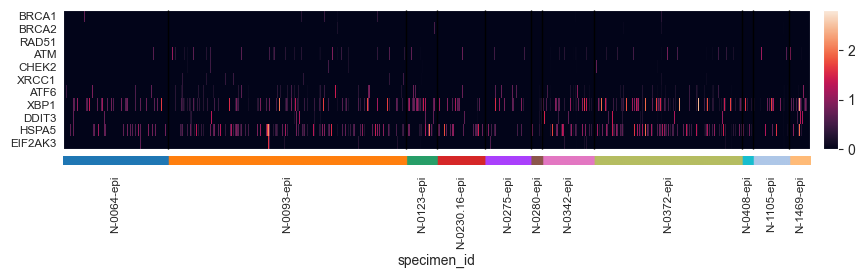

In [6]:
for adata in [all_real, all_noise]:
    sc.pl.heatmap(
        adata,
        var_names=chemo_resistance_genes,
        groupby='specimen_id',
        use_raw=True,
        swap_axes=True,
        show=True,
    )